## OneMax problem with 1000 bits

In [1]:
from thefittest.optimizers import GeneticAlgorithm
from thefittest.benchmarks import OneMax

number_of_iterations = 100
population_size = 200
string_length = 1000

optimizer = GeneticAlgorithm(fitness_function=OneMax(),
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=string_length,
                         show_progress_each=10)

optimizer.fit()

fittest = optimizer.get_fittest()

0 iteration with fitness = 540.0
10 iteration with fitness = 680.0
20 iteration with fitness = 785.0
30 iteration with fitness = 863.0
40 iteration with fitness = 919.0
50 iteration with fitness = 950.0
60 iteration with fitness = 961.0
70 iteration with fitness = 968.0
80 iteration with fitness = 978.0
90 iteration with fitness = 988.0


## Rastrign problem with 10 variables

In [2]:
import numpy as np
from thefittest.optimizers import GeneticAlgorithm
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rastrigin


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=Rastrigin(),
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=30,
                         minimization=True,
                         selection="tournament_k",
                         crossover="two_point",
                         mutation="weak",
                         tour_size=6,
                         optimal_value=0.)

optimizer.fit()

fittest = optimizer.get_fittest()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])



0 iteration with fitness = 100.47498290859161
30 iteration with fitness = 1.452130338925338
60 iteration with fitness = 1.0090724551498678
90 iteration with fitness = 0.9950936554278336
120 iteration with fitness = 0.9949592692116358
150 iteration with fitness = 0.9949590596765461
180 iteration with fitness = 0.9949590571358886
210 iteration with fitness = 0.9949590570945617
240 iteration with fitness = 0.9949590570933022
270 iteration with fitness = 0.9949590570932916
The fittest individ: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Custom problem

0 iteration with fitness = 5.073114593862725
10 iteration with fitness = 0.0020636323585874645
20 iteration with fitness = 9.485373779036974e-07
30 iteration with fitness = 1.7013960030332617e-08
40 iteration with fitness = 4.4517304480291165e-09
The fittest individ: [1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0]
The fittest individ: [ 5.00000788 12.0000033 ]
with fitness -7.289287581738538e-11


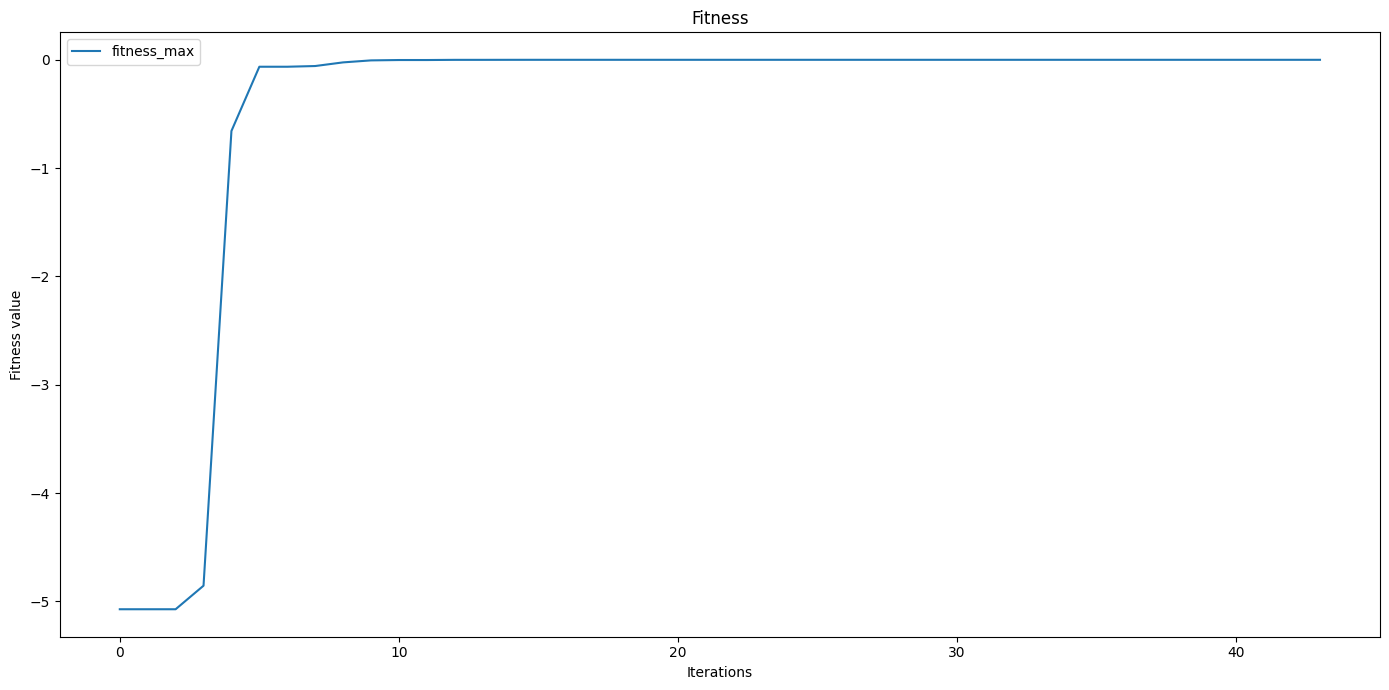

In [3]:
import numpy as np
from thefittest.optimizers import GeneticAlgorithm
from thefittest.tools.transformations import GrayCode
import matplotlib.pyplot as plt

def custom_problem(x):
    return (5 - x[:, 0])**2 + (12 - x[:, 1])**2


n_dimension = 2
left_border = -100.
right_border = 100.
n_bits_per_variable = 32

number_of_iterations = 100
population_size = 100

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)


genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=custom_problem,
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=10,
                         minimization=True,
                         optimal_value=0,
                         termination_error_value=1e-10,
                         keep_history=True,
                         elitism=False)


optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])


iters_done = len(stats['fitness_max'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=1)
ax.plot(range(iters_done), stats['fitness_max'], label = "fitness_max")
ax.set_title('Fitness')
ax.set_ylabel('Fitness value')
ax.set_xlabel("Iterations")
ax.legend()

plt.tight_layout()
plt.show()

## SelfCGA

0 iteration with fitness = 29.722937278134403
30 iteration with fitness = 0.004899300904438076
60 iteration with fitness = 1.5818803689657902e-05
90 iteration with fitness = 4.1280074372878825e-07
120 iteration with fitness = 1.015467205726896e-09
150 iteration with fitness = 8.310358156743703e-12
180 iteration with fitness = 6.364537803033032e-14
210 iteration with fitness = 5.185196889911925e-15
240 iteration with fitness = 1.1411227865409934e-15
270 iteration with fitness = 1.7618285302889447e-16
The fittest individ: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0

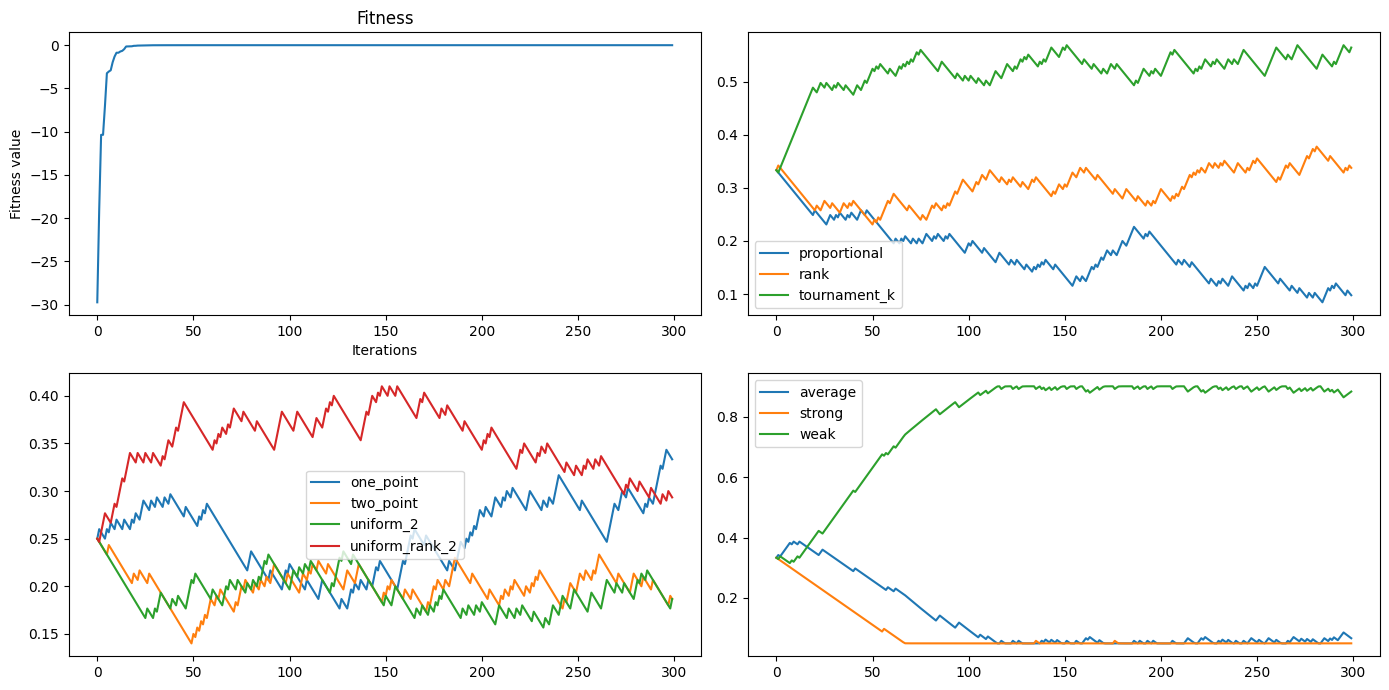

In [4]:
import numpy as np
from collections import defaultdict
from thefittest.optimizers import SelfCGA
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Sphere
import matplotlib.pyplot as plt


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = SelfCGA(fitness_function=Sphere(),
                    genotype_to_phenotype=genotype_to_phenotype.transform,
                    iters=number_of_iterations,
                    pop_size=population_size,
                    str_len=sum(parts),
                    show_progress_each=30,
                    minimization=True,
                    selections=("tournament_k", "rank", "proportional"),
                    crossovers=("two_point", "one_point", "uniform_2", "uniform_rank_2"),
                    mutations=("weak", "average", "strong"),
                    tour_size=5,
                    K=4,
                    keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)

ax[0][0].plot(range(number_of_iterations), stats['fitness_max'])
ax[0][0].set_title('Fitness')
ax[0][0].set_ylabel('Fitness value')
ax[0][0].set_xlabel("Iterations")

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()


## SHAGA

0 iteration with fitness = 4851.053359345639
30 iteration with fitness = 40.48901068353645
60 iteration with fitness = 11.548785443516945
90 iteration with fitness = 3.612565483967017
120 iteration with fitness = 1.4114065260332738
150 iteration with fitness = 0.43412341669097737
180 iteration with fitness = 0.24177214680878648
210 iteration with fitness = 0.10045038912081253
240 iteration with fitness = 0.06002373437384467
270 iteration with fitness = 0.03972490507790562
The fittest individ: [1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1

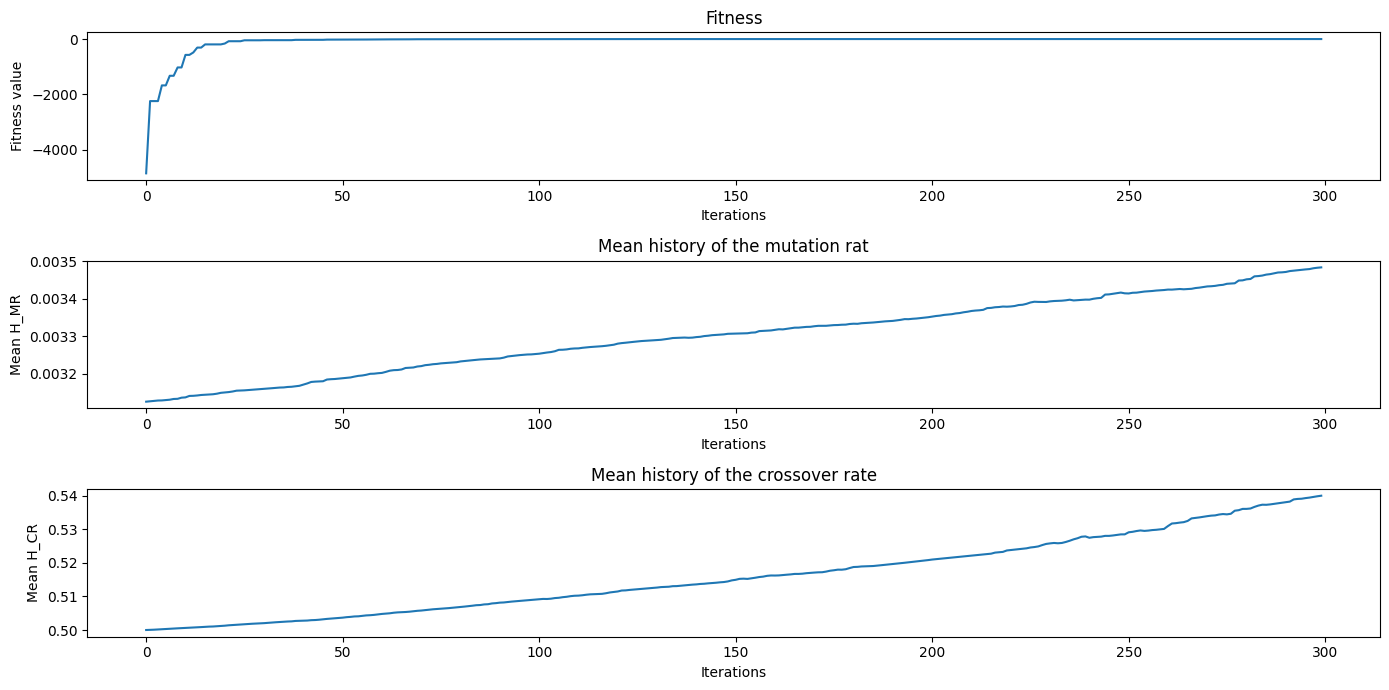

In [5]:
import numpy as np
from collections import defaultdict
from thefittest.optimizers import SHAGA
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rosenbrock
import matplotlib.pyplot as plt


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = SHAGA(fitness_function=Rosenbrock(),
                  genotype_to_phenotype=genotype_to_phenotype.transform,
                  iters=number_of_iterations,
                  pop_size=population_size,
                  str_len=sum(parts),
                  show_progress_each=30,
                  minimization=True,
                  keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=3)

ax[0].plot(range(number_of_iterations), stats['fitness_max'])
ax[0].set_title('Fitness')
ax[0].set_ylabel('Fitness value')
ax[0].set_xlabel("Iterations")

ax[1].plot(range(number_of_iterations), np.array(stats['H_MR']).mean(axis = 1))
ax[1].set_title('Mean history of the mutation rat')
ax[1].set_ylabel('Mean H_MR')
ax[1].set_xlabel("Iterations")

ax[2].plot(range(number_of_iterations), np.array(stats['H_CR']).mean(axis = 1))
ax[2].set_title('Mean history of the crossover rate')
ax[2].set_ylabel('Mean H_CR')
ax[2].set_xlabel("Iterations")

plt.tight_layout()
plt.show()